In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 500  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [4]:
model.load_model("models/100DCallOptionXVAPaper.pth")

In [ ]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 39900, Loss: 2.933e+01, Y0: 1.596, Time: 0.18, Learning Rate: 1.000e-09
total time: 17.843403577804565 s


In [5]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [6]:
Y_pred = Y_pred * 100

In [7]:
graph = model.iteration, model.training_loss

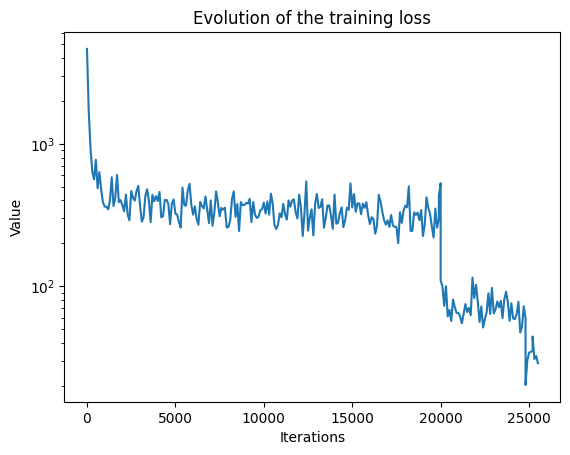

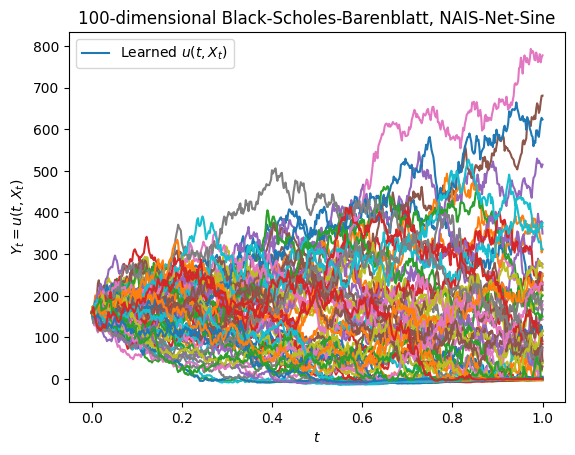

In [8]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [9]:
Y_pred.shape

(4096, 501, 1)

In [10]:
Y_preds = Y_pred.reshape(4096, 501)

In [11]:
time_stamps = t_test[0].reshape(501,)
time_stamps

array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
       0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
       0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
       0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
       0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
       0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106,
       0.108, 0.11 , 0.112, 0.114, 0.116, 0.118, 0.12 , 0.122, 0.124,
       0.126, 0.128, 0.13 , 0.132, 0.134, 0.136, 0.138, 0.14 , 0.142,
       0.144, 0.146, 0.148, 0.15 , 0.152, 0.154, 0.156, 0.158, 0.16 ,
       0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176, 0.178,
       0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194, 0.196,
       0.198, 0.2  , 0.202, 0.204, 0.206, 0.208, 0.21 , 0.212, 0.214,
       0.216, 0.218, 0.22 , 0.222, 0.224, 0.226, 0.228, 0.23 , 0.232,
       0.234, 0.236, 0.238, 0.24 , 0.242, 0.244, 0.246, 0.248, 0.25 ,
       0.252, 0.254,

In [12]:
Y_preds[:,0][:,None]

array([[159.63423],
       [159.63423],
       [159.63423],
       ...,
       [159.63423],
       [159.63423],
       [159.63423]], dtype=float32)

In [13]:
Y_preds

array([[ 1.5963423e+02,  1.4503192e+02,  1.3490108e+02, ...,
         2.5659415e+02,  2.5507936e+02,  2.4772229e+02],
       [ 1.5963423e+02,  1.5245685e+02,  1.5127975e+02, ...,
         1.4922619e-01, -7.8287721e-02, -8.2495809e-02],
       [ 1.5963423e+02,  1.5661607e+02,  1.5678255e+02, ...,
        -6.9793165e-01, -5.7177544e-01, -5.7045817e-01],
       ...,
       [ 1.5963423e+02,  1.6237857e+02,  1.7373459e+02, ...,
        -1.7150789e+00, -1.7289370e+00, -1.7094284e+00],
       [ 1.5963423e+02,  1.5376009e+02,  1.5401395e+02, ...,
         3.5561911e+02,  3.5618921e+02,  3.5778607e+02],
       [ 1.5963423e+02,  1.6361710e+02,  1.5964153e+02, ...,
        -2.4400206e+00, -2.2972794e+00, -2.2478251e+00]], dtype=float32)

In [14]:
r = 0.01

In [15]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([159.62978, 159.64476, 159.64282, 159.39784, 159.3462 , 159.24557,
       159.13329, 159.00417, 158.97462, 158.9199 , 158.99245, 159.08456,
       158.87335, 158.81169, 158.65215, 158.46196, 158.46526, 158.42787,
       158.27104, 158.21732, 158.16261, 158.18338, 158.34932, 158.2435 ,
       158.21873, 158.196  , 158.1934 , 157.98882, 157.84067, 157.96445,
       158.01434, 157.96758, 157.91878, 157.76393, 157.91438, 157.79633,
       158.05724, 158.08345, 157.95097, 157.83742, 157.7552 , 157.52686,
       157.49086, 157.401  , 157.41768, 157.18982, 157.08159, 157.07375,
       157.10106, 157.25336, 156.9882 , 157.03932, 156.92107, 156.8469 ,
       156.69067, 156.6521 , 156.56917, 156.52263, 156.34563, 156.4083 ,
       156.28526, 156.10638, 155.83408, 155.79178, 155.97092, 156.0657 ,
       156.14226, 156.01329, 156.13829, 156.27638, 156.18332, 156.07758,
       156.14247, 155.96033, 156.01552, 156.0788 , 156.21376, 156.1676 ,
       156.2964 , 156.21208, 156.21371, 156.2569 , 

In [16]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [27]:
from scipy.stats import multivariate_normal as normal
dw_sample = normal.rvs(size=[10000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([10000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([10000, D]) * 100
factor = np.exp((0.01-(0.25**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.25 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [28]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
payoff = np.maximum(portfolio - 100 * 100, 0)
average = np.mean(payoff, axis=0, keepdims=True)
mc_price = np.exp(-0.01 * 1) * average[:, :, 500]

In [29]:
mc_price

array([[155.07739533]])

In [30]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

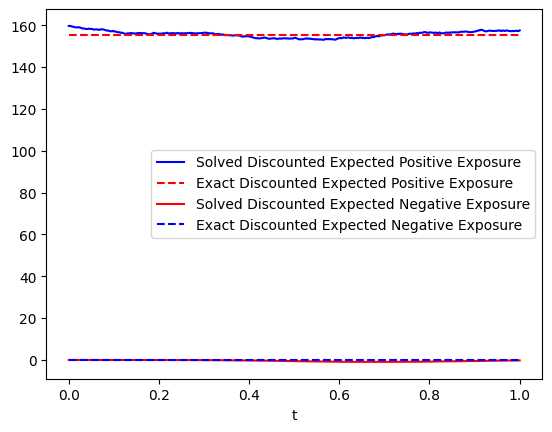

In [31]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [32]:
np.mean((epe_exact - epe)**2 / epe_exact ** 2) 

0.00011401145349241303

In [33]:
var = np.abs(np.quantile((Y_preds - Y_preds[:,0][:,None]), 0.05, axis=0))

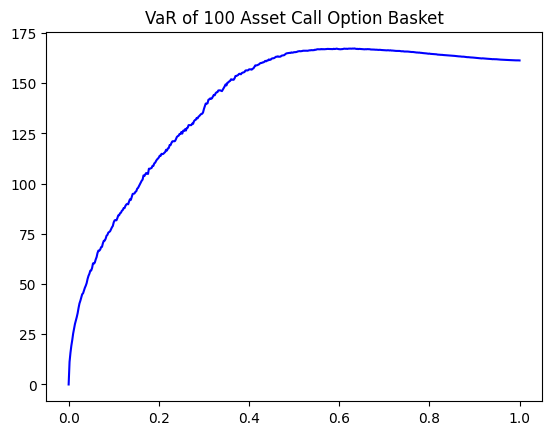

In [34]:
plt.title('VaR of 100 Asset Call Option Basket')
plt.plot(time_stamps,var,'b',label='VaR')
plt.show()

In [35]:
rate = 0.01
R_C = 0.3
R_B = 0.4
collateral = 0
intensityC = 0.1
intensityB = 0.01

In [36]:
Y_preds

array([[ 1.5963423e+02,  1.4503192e+02,  1.3490108e+02, ...,
         2.5659415e+02,  2.5507936e+02,  2.4772229e+02],
       [ 1.5963423e+02,  1.5245685e+02,  1.5127975e+02, ...,
         1.4922619e-01, -7.8287721e-02, -8.2495809e-02],
       [ 1.5963423e+02,  1.5661607e+02,  1.5678255e+02, ...,
        -6.9793165e-01, -5.7177544e-01, -5.7045817e-01],
       ...,
       [ 1.5963423e+02,  1.6237857e+02,  1.7373459e+02, ...,
        -1.7150789e+00, -1.7289370e+00, -1.7094284e+00],
       [ 1.5963423e+02,  1.5376009e+02,  1.5401395e+02, ...,
         3.5561911e+02,  3.5618921e+02,  3.5778607e+02],
       [ 1.5963423e+02,  1.6361710e+02,  1.5964153e+02, ...,
        -2.4400206e+00, -2.2972794e+00, -2.2478251e+00]], dtype=float32)

In [39]:
discount = np.exp(-(rate+intensityB+intensityC)*np.linspace(0,T,N+1))

In [40]:
phi_cva = (1-R_C)*discount*np.maximum(-Y_preds,0)*intensityC

In [41]:
phi_dva = (1-R_B)*discount*np.maximum(Y_preds,0)*intensityB

In [42]:
dva = np.sum(phi_dva.reshape(4096,1,501), axis=-1) - (phi_dva.reshape(4096,1,501)[:,:,-1] + phi_dva.reshape(4096,1,501)[:,:,0])/2

In [43]:
dva

array([[869.18232864],
       [374.53165097],
       [339.96803761],
       ...,
       [228.8370695 ],
       [624.79374264],
       [184.15747739]])

In [44]:
dva[:,0] * T/N

array([1.73836466, 0.7490633 , 0.67993608, ..., 0.45767414, 1.24958749,
       0.36831495])

In [45]:
dva_pred = np.mean(dva[:,0] * T/N)
dva_pred

0.884736405404645

In [46]:
dva_exact = np.sum(epe_exact * intensityB * discount) * (1-R_B) * T/N
dva_exact

0.8785599234105577

In [47]:
np.mean((dva_exact - dva_pred)**2 / dva_exact ** 2) 

4.9424192487178425e-05

In [158]:
model.save_model("models/100DCallOptionXVAPaper.pth")